In this project, we aim to help you to discover how to create an API that might be requested to interact with a ML model. This is an interesting solution when you want to keep your model architecture secret or to make your model available to users already having an API. By creating an API, and deploying it, your model can so that receive request using the internet protocol as presented by the illustration below.

## **Introduction**

# Project Journey Overview

As we embark on our project journey, our first step will be to construct a minimal API demo utilizing FastAPI. This preliminary phase is crucial for ensuring that all components are correctly configured and operating as intended.

Following the successful setup of the demo, our focus will shift to crafting our own API tailored to interact seamlessly with a Machine Learning model. This bespoke API will facilitate the following workflow:

1. **Receiving data** through API requests from our clients.
2. **Collaboratively processing** the received data to prepare it for ingestion into the Machine Learning model.
3. **Transmitting** the preprocessed data to the Machine Learning model for prediction.
4. **Coordinating** the handling of predictions generated by the model.
5. **Orchestrating** the delivery of processed predictions as the API's response to our clients' initial requests.

By collectively implementing this comprehensive process, our API will empower users to harness the capabilities of Machine Learning, thereby enabling them to access valuable insights and predictions derived from their input data.


### <b> Analytical Questions

1. Is there a correlation between plasma glucose levels (PRG) and the likelihood of developing sepsis?

2. What is the distribution of blood pressure (PR) among patients who develop sepsis compared to those who do not?

3. Are there any significant differences in body mass index (M11) between patients who develop sepsis and those who do not?

4.   How do the levels of blood work results (PL, SK, TS, BD2) correlate with the development of sepsis in ICU patients?

5. How does age (Age) relate to the probability of developing sepsis?

6.  Is there a difference in the number of sepsis patients between patients who have insurance and those who do not?

7. What is the average number of people with sepsis and those without?


### <b> Hypothesis


Null Hypothesis (H0): There is no significant difference in the likelihood of developing sepsis between patients with higher Plasma Glucose levels (PRG) and those with lower levels.

Alternate Hypothesis (H1): Patients with higher Plasma Glucose levels (PRG) are significantly more likely to develop sepsis compared to those with lower levels.

###  **Data Understanding**

Column features:
1. ID: number to represent patient ID
2. PRG: Plasma glucose
3. PL: Blood Work Result-1 (mu U/ml)
4. PR: Blood Pressure (mm Hg)
5. SK: Blood Work Result-2 (mm)
6. TS: Blood Work Result-3 (mu U/ml)
7. M11: Body mass index (weight in kg/(height in m)^2
8. BD2: Blood Work Result-4 (mu U/ml)
9. Age: patients age (years)
10. Insurance: If a patient holds a valid insurance card
11. Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

### <b> Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from numpy import log1p
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
from scipy import stats
import joblib
import os 

In [90]:
df_Paitients_Files_Test= pd.read_csv('Dataset/Paitients_Files_Test.csv')
# Display the first few rows of the DataFrame
df_Paitients_Files_Test.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [91]:
df_Paitients_Files_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [92]:
df_Paitients_Files_Train= pd.read_csv('Dataset/Paitients_Files_Train.csv')
# Display the first few rows of the DataFrame
df_Paitients_Files_Train.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


### <b> Exploratory Data Analysis

In [93]:
df_Paitients_Files_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


. The DataFrame contains 599 rows and 11 columns.

. Most columns contain integer or floating-point values, while two columns are of the object data type, which usually indicates strings or mixed data types.

In [94]:
#checking for null values
df_Paitients_Files_Train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

. There are no missing values in the DataFrame.

In [95]:
# checking for duplicate rows
df_Paitients_Files_Train.duplicated().sum()

0

. There no duplicates in the Dataframe

In [96]:
df_Paitients_Files_Train.shape
print("Shape of the DataFrame:", df_Paitients_Files_Train.shape)

Shape of the DataFrame: (599, 11)


In [97]:
# checking columns in df
df_Paitients_Files_Train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [98]:
#statistical values of a DataFrame 
statistics = df_Paitients_Files_Train.describe(include='all')
statistics

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
count,599,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599
unique,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,ICU200010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391
mean,NaN,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144,NaN
std,NaN,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,NaN
25%,NaN,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000,NaN
50%,NaN,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000,NaN
75%,NaN,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000,NaN


Here is the summary of the descriptive statistics provided:

- **PRG (Plasma Glucose)**: The average plasma glucose level is approximately 3.82 with a standard deviation of approximately 3.36. The minimum and maximum values recorded are 0 and 17, respectively.
- **PL (Blood Work Result-1)**: The average blood work result-1 value is approximately 120.15 with a standard deviation of approximately 32.68. The minimum and maximum values recorded are 0 and 198, respectively.
- **PR (Blood Pressure)**: The average blood pressure is approximately 68.73 with a standard deviation of approximately 19.34. The minimum and maximum values recorded are 0 and 122, respectively.
- **SK (Blood Work Result-2)**: The average blood work result-2 value is approximately 20.56 with a standard deviation of approximately 16.02. The minimum and maximum values recorded are 0 and 99, respectively.
- **TS (Blood Work Result-3)**: The average blood work result-3 value is approximately 79.46 with a standard deviation of approximately 116.58. The minimum and maximum values recorded are 0 and 846, respectively.
- **M11 (Body Mass Index)**: The average body mass index is approximately 31.92 with a standard deviation of approximately 8.01. The minimum and maximum values recorded are 0 and 67.1, respectively.
- **BD2 (Blood Work Result-4)**: The average blood work result-4 value is approximately 0.48 with a standard deviation of approximately 0.34. The minimum and maximum values recorded are 0.078 and 2.42, respectively.
- **Age**: The average age of patients is approximately 33.29 with a standard deviation of approximately 11.83. The youngest patient is 21 years old, and the oldest is 81 years old.

These statistics provide insights into the distribution and variability of each numerical feature in the dataset.


In [99]:

# drop the 'ID' column
df_Paitients_Files_Train.drop(columns=['ID'], inplace=True)


. The reason I dropped the 'ID' column is because it doesn't contain meaningful information for analysis and is redundant with an existing index or identifier, dropping it can improve clarity and efficiency.

In [100]:
# First Rename the columns
train_data = df_Paitients_Files_Train.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age",
    "Sepssis": "Sepsis"
})
train_data.head()

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


### <b>  Univariate Analysis

##### Histogram for numerical columns

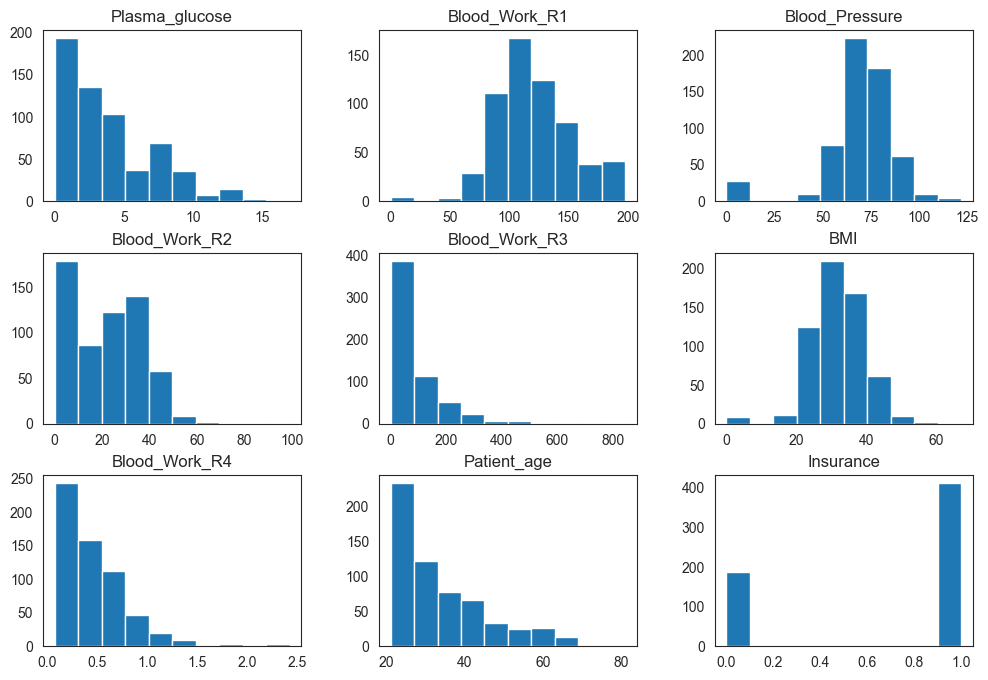

In [101]:
# Visualizing the distribution of Numerical Variables
train_data.hist(figsize=(12,8), grid= False)
plt.show()

1. **PRG (Plasma glucose):** The distribution of plasma glucose levels appears to be right-skewed, with a concentration of data points towards lower values and a longer tail extending towards higher glucose levels.

2. **PR (Blood Pressure), PL (Blood Work Result-1):** The distribution shows a somewhat normal pattern, with a peak around the center and a tapering of data points on both sides.

3. **SK (Blood Work Result-2):** Interpretation of this histogram is challenging due to uneven bin sizes, which make it difficult to discern a clear distribution pattern.

4. **TS (Blood Work Result-3), BD2 (Blood Work Result-4):** The distribution is skewed to the right
5. **M11 (Body mass index):** The distribution slightly skews to the right, suggesting that most patients have a normal BMI, with fewer individuals at the extremes of higher or lower values.

6. **Age:** The distribution is skewed to the right, indicating a concentration of patients in younger age groups and fewer individuals in older age brackets.


##### Checking for outliers

<function matplotlib.pyplot.show(close=None, block=None)>

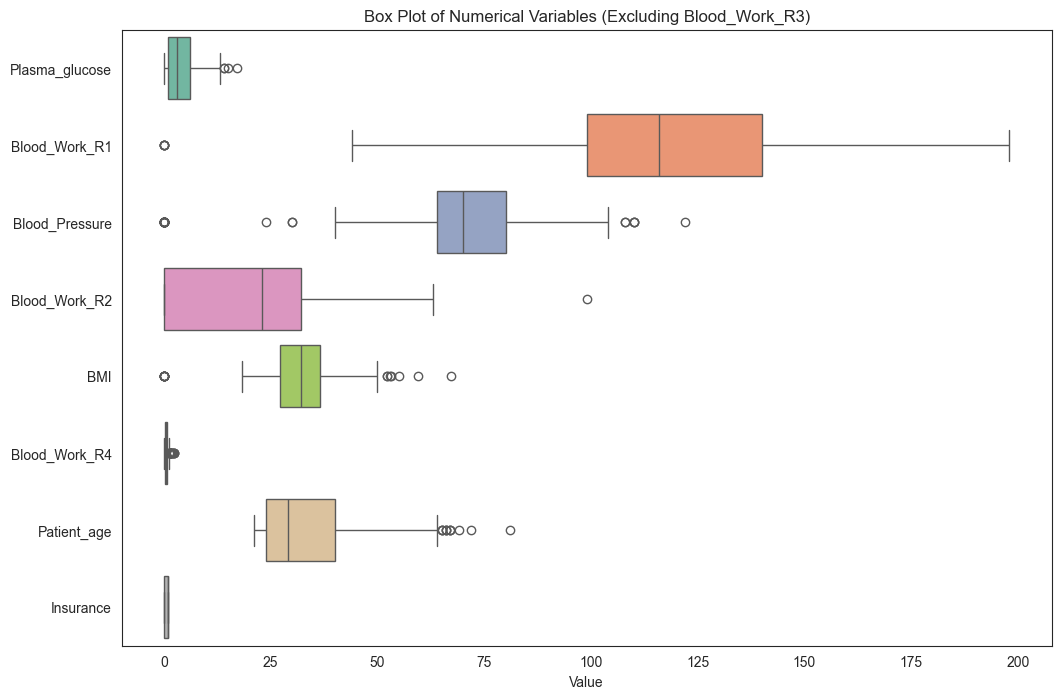

In [102]:
# Select numerical columns excluding 'Blood_Work_R3'
numerical_columns = train_data.drop(columns=['Blood_Work_R3']).select_dtypes(include=['int64', 'float64'])

# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_columns, orient='h', palette='Set2')
plt.title('Box Plot of Numerical Variables (Excluding Blood_Work_R3)')
plt.xlabel('Value')
plt.show


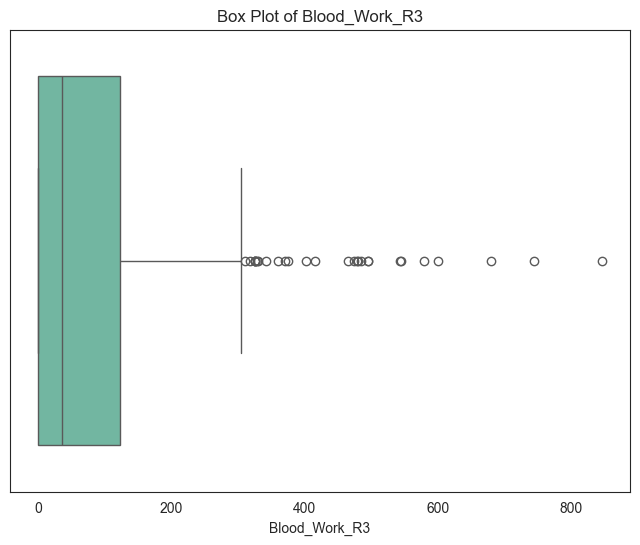

In [103]:
# Create box plot for 'Blood_Work_R3' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_data['Blood_Work_R3'], palette='Set2')
plt.title('Box Plot of Blood_Work_R3')
plt.xlabel('Blood_Work_R3')
plt.show()

- All numerical columns have outliers except for insurance.
- Outliers can bias statistical parameter estimates like mean and standard deviation, impacting model coefficients and predictions.
- Outliers introduce noise and obscure patterns, reducing predictive model accuracy.
- To mitigate outlier effects:
  - Clean or correct extreme outliers.
  - Use robust modeling techniques and transformations.
  - Implement ensemble methods and cross-validation for reliable performance evaluation.


In [104]:
# Convert the values in the 'Sepsis' column of the train_data DataFrame to boolean values
# 'Positive' is replaced with True and 'Negative' is replaced with False
train_data['Sepsis'] = train_data['Sepsis'].replace({'Positive': True, 'Negative': False})


In [105]:
# unique values in the 'Sepsis' column of the train_data DataFrame
train_data['Sepsis'].unique()



array([ True, False])

In [106]:
train_data.head()

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,6,148,72,35,0,33.6,0.627,50,0,True
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,1,False
4,0,137,40,35,168,43.1,2.288,33,1,True


##### Bar plot to visualize the frequency of sepsis

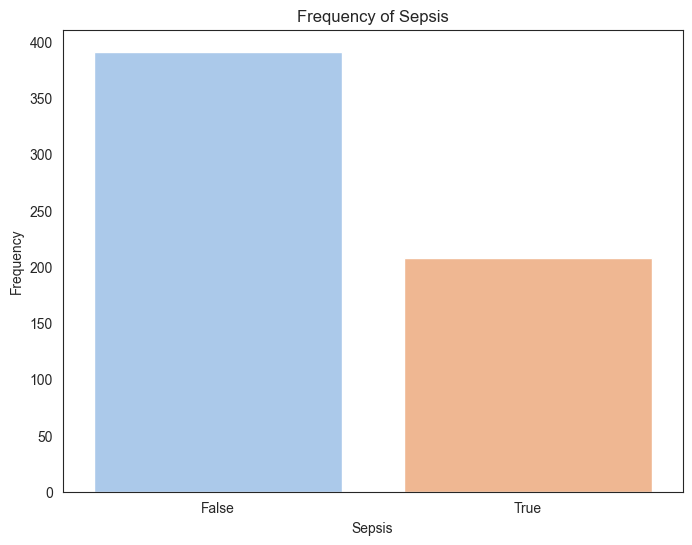

In [107]:

# Set the style of seaborn
sns.set_style("white")

# Define custom colors for the bars
colors = sns.color_palette("pastel")

# Create a bar plot for the 'Sepsis' column with custom colors
plt.figure(figsize=(8, 6))
sns.countplot(x='Sepsis', data=train_data, palette=colors)
plt.title('Frequency of Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Frequency')

# Remove gridlines
plt.grid(False)

plt.show()

### <b> Bivariate Analysis

Assessing the relationship between  'Insurance' and 'Sepsis'. 

In [108]:


# Contingency table
contingency_table = pd.crosstab(train_data['Insurance'], train_data['Sepsis'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpret results
alpha = 0.05
print("Chi-square Test Results:")
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Insurance and Sepsis.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Insurance and Sepsis.")


Chi-square Test Results:
Chi-square Statistic: 2.0712782081677066
P-value: 0.1500956791860619
Fail to reject the null hypothesis: There is no significant association between Insurance and Sepsis.


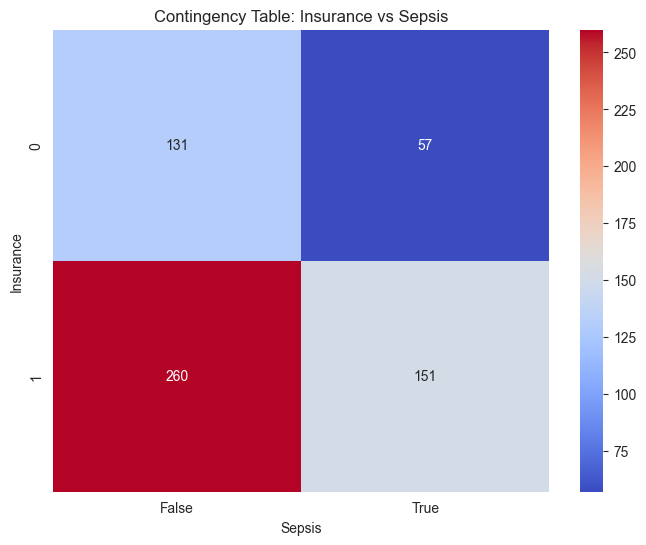

In [109]:

# Plot the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Contingency Table: Insurance vs Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Insurance')
plt.show()


- The chi-square statistic is 2.071 and the corresponding p-value is 0.1501.
- The p-value of 0.1501 indicates that there is a 15.01% probability of observing the observed association between 'Insurance' and 'Sepsis' by random chance alone, assuming the null hypothesis is true.
- With a significance level of 0.05, since the p-value (0.1501) is greater than the significance level, we fail to reject the null hypothesis.
- Therefore, we conclude that there is insufficient evidence to suggest a significant association between 'Insurance' and 'Sepsis' in the dataset.
- This suggests that having insurance may not have a strong influence on the development of sepsis, at least in the context of the variables included in the analysis.


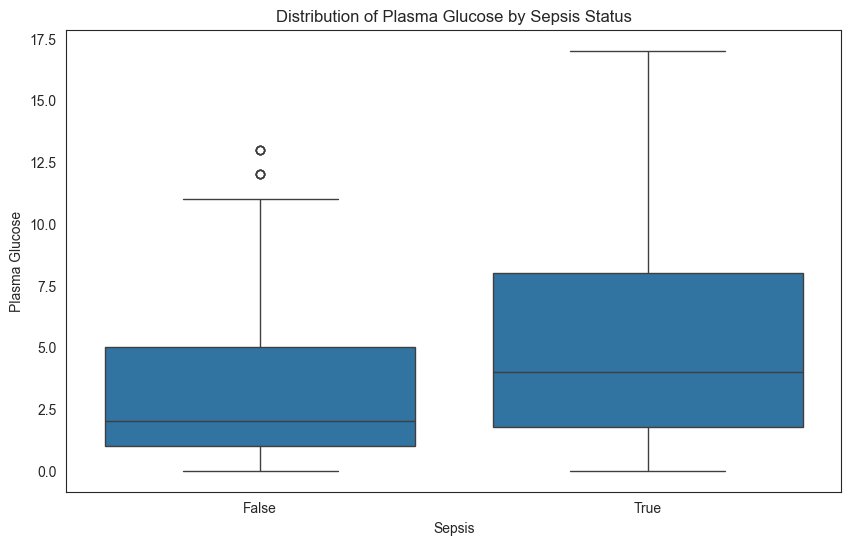

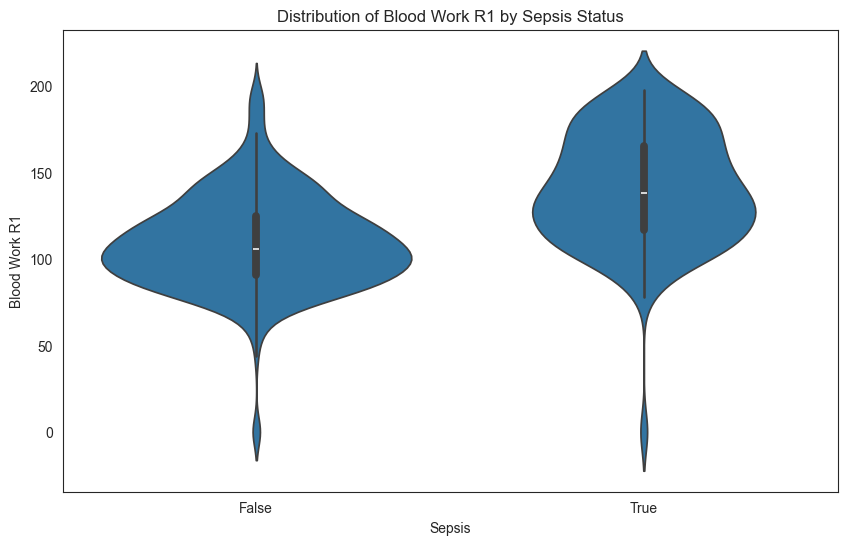

In [110]:

# Boxplot comparing the distribution of a continuous variable across categories of a categorical variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepsis', y='Plasma_glucose', data=train_data)
plt.title('Distribution of Plasma Glucose by Sepsis Status')
plt.xlabel('Sepsis')
plt.ylabel('Plasma Glucose')
plt.show()

# Violin plot comparing the distribution of a continuous variable across categories of a categorical variable
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sepsis', y='Blood_Work_R1', data=train_data)
plt.title('Distribution of Blood Work R1 by Sepsis Status')
plt.xlabel('Sepsis')
plt.ylabel('Blood Work R1')
plt.show()


#### <b> Multivariate Analysis

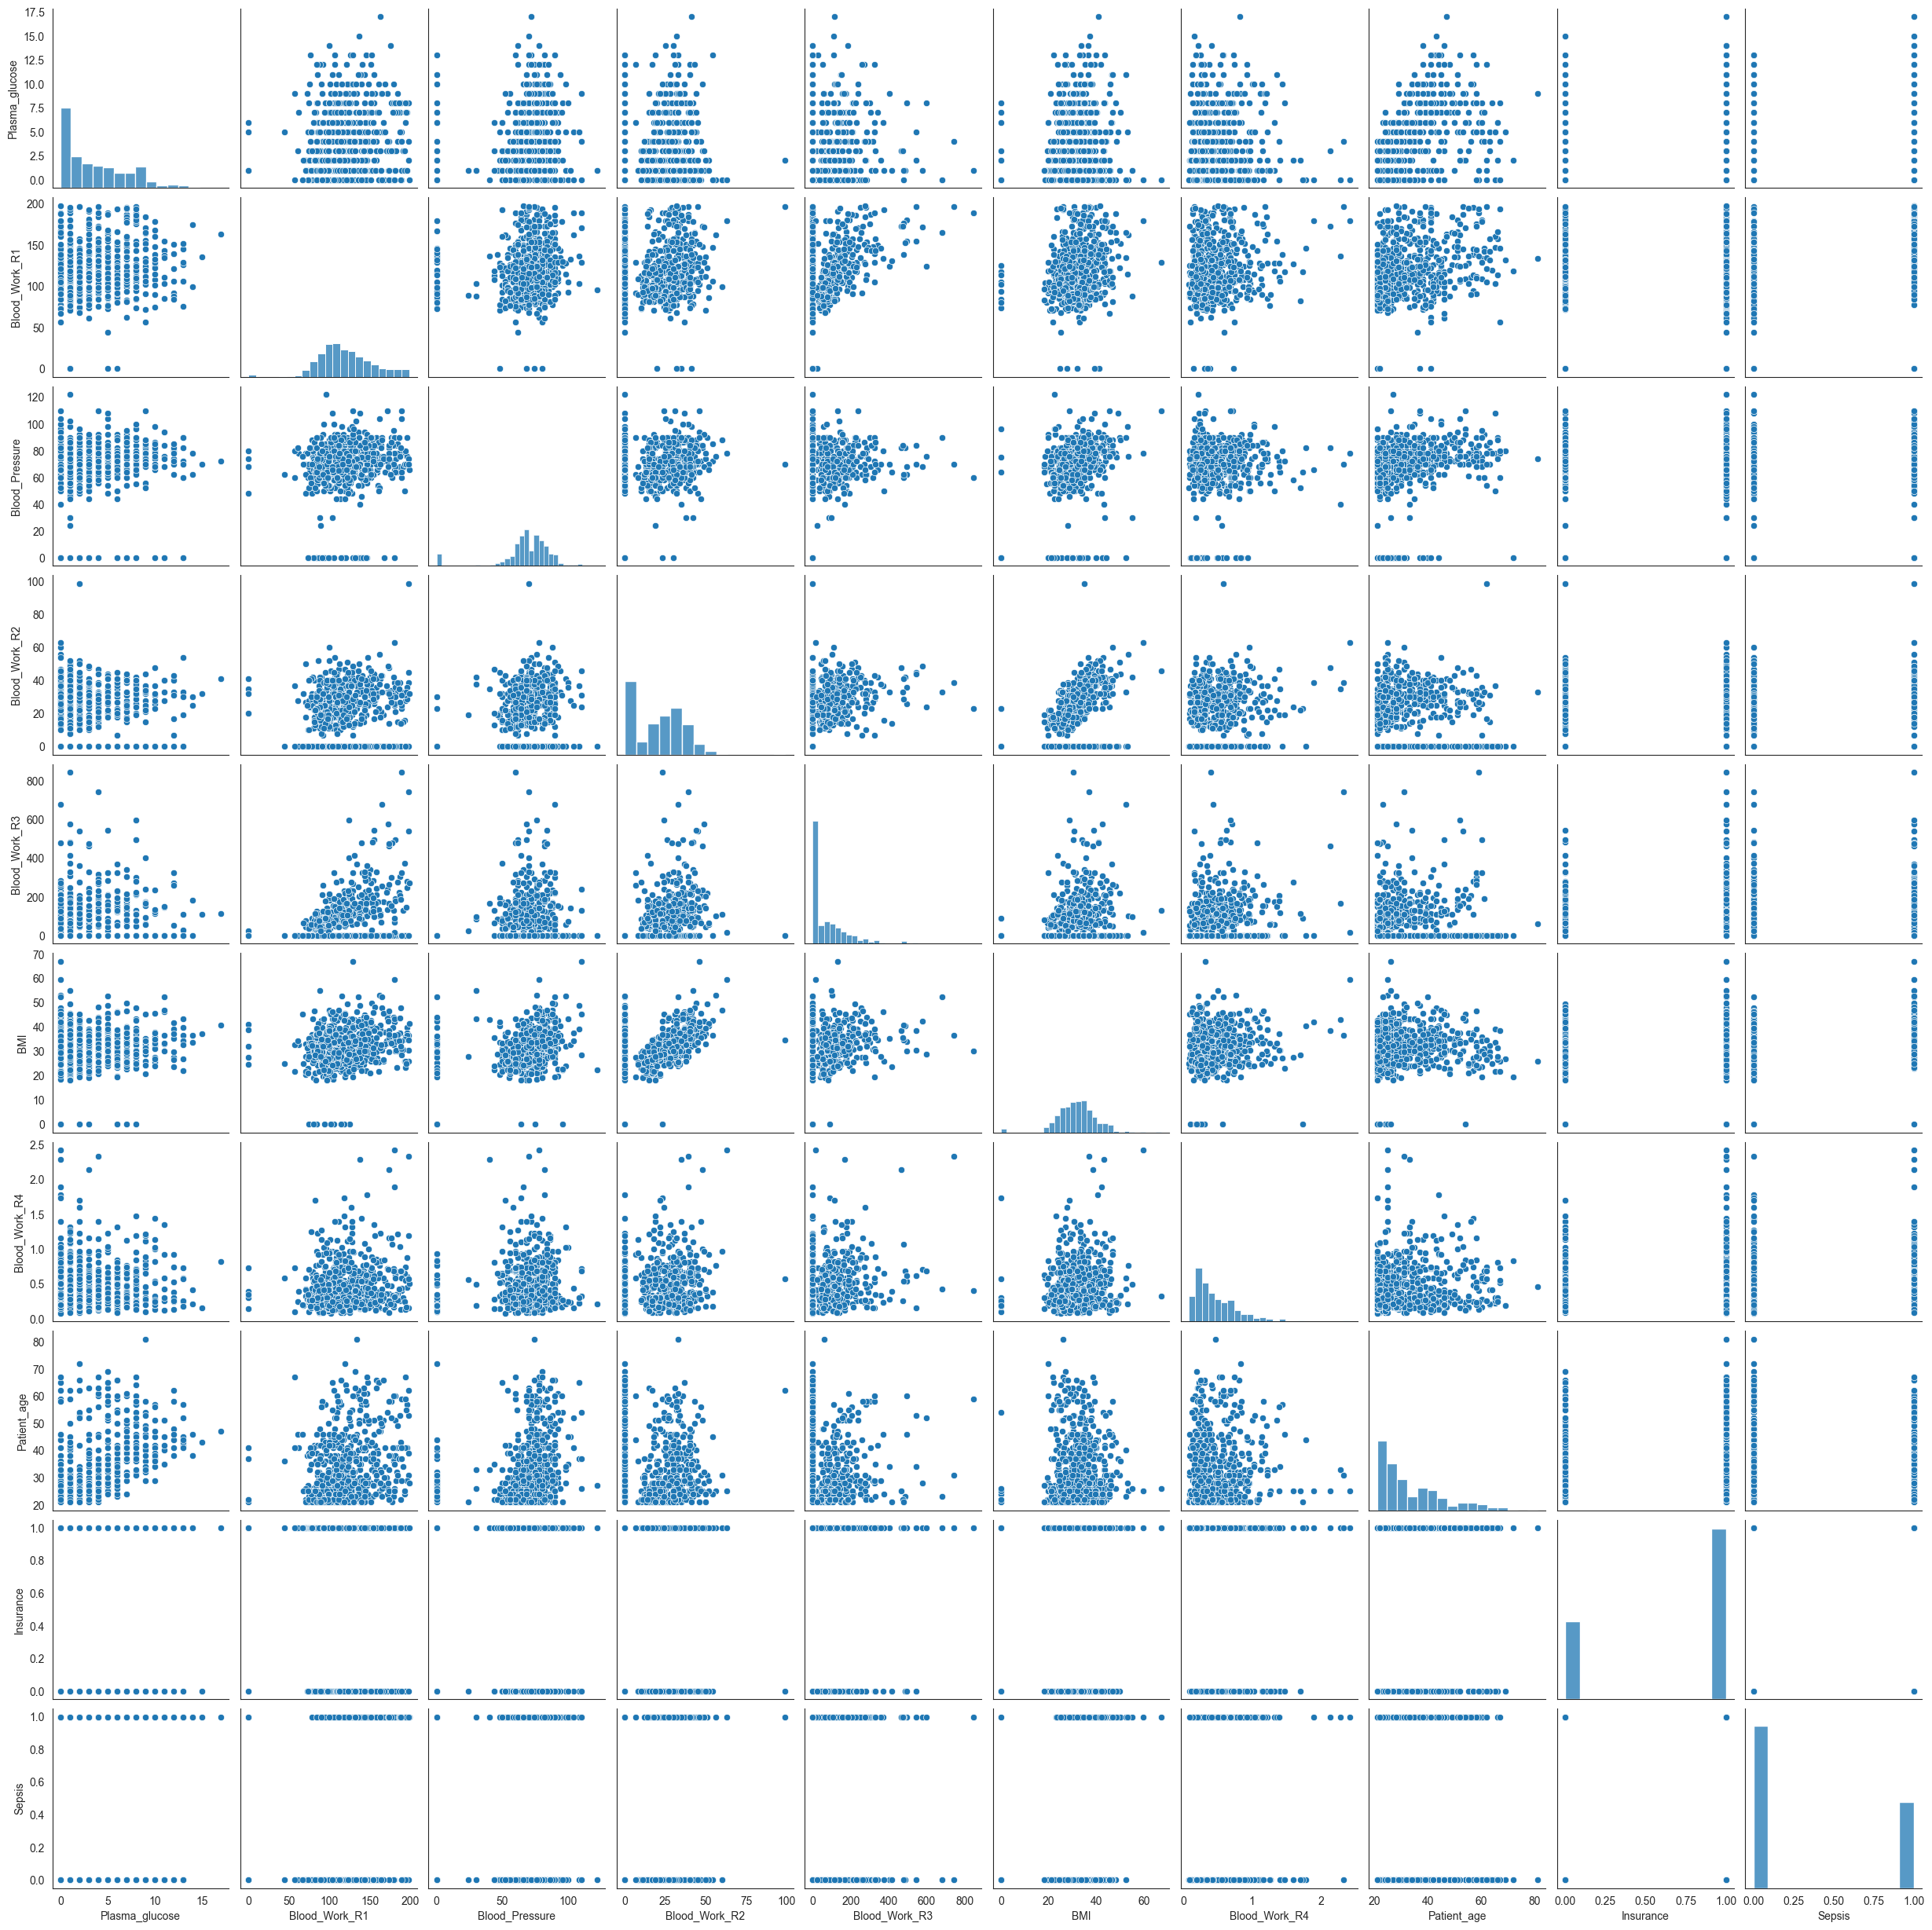

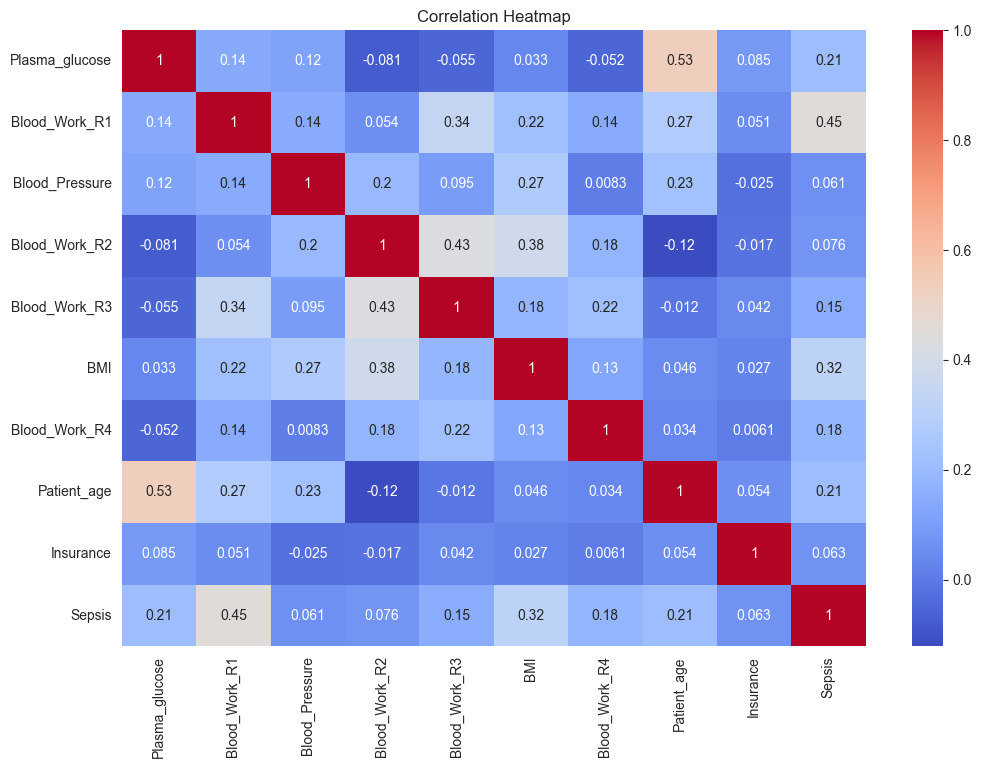

In [111]:
# Pairplot
sns.pairplot(train_data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### <b> Answering Analytical Questions

##### 1. Is there a correlation between plasma glucose levels (PRG) and the likelihood of developing sepsis?



In [112]:
# Calculate the correlation between 'Plasma_glucose' and 'Sepsis'
correlation = train_data['Plasma_glucose'].corr(train_data['Sepsis'])
correlation


0.20711491012845143

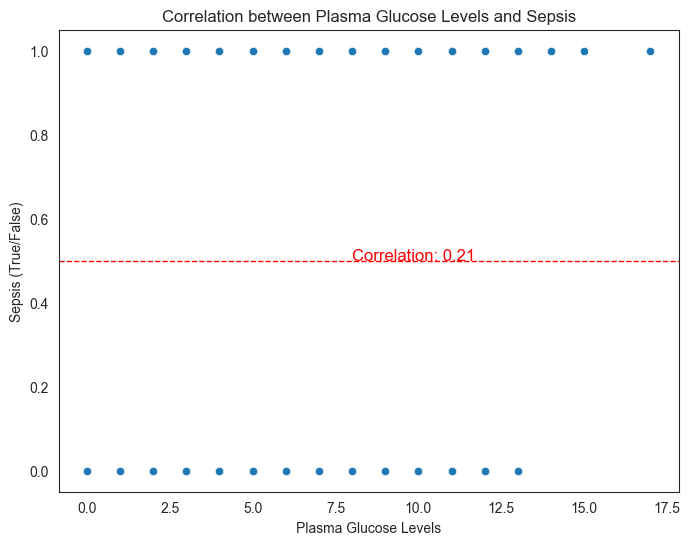

In [113]:
# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='Plasma_glucose', y='Sepsis')
plt.title('Correlation between Plasma Glucose Levels and Sepsis')
plt.xlabel('Plasma Glucose Levels')
plt.ylabel('Sepsis (True/False)')
plt.axhline(0.5, color='red', linestyle='--', linewidth=1)  # Adding a horizontal line at y=0.5 for reference
plt.text(8, 0.5, f'Correlation: {correlation:.2f}', color='red', fontsize=12)
plt.show()


. The correlation coefficient between plasma glucose levels (PRG) and the likelihood of developing sepsis is approximately 0.21. This value indicates a weak positive correlation between these two variables.

. In this case, while there is a positive relationship between plasma glucose levels and the likelihood of developing sepsis, it is not strong enough to make definitive conclusions about the impact of plasma glucose levels on sepsis risk.

##### 2. What is the distribution of blood pressure (PR) among patients who develop sepsis compared to those who do not?



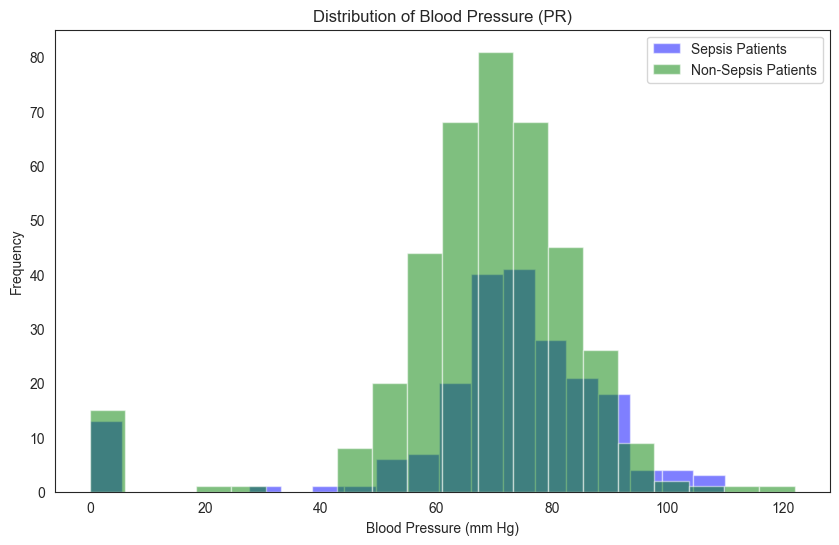

In [114]:
# Create subsets for patients with and without sepsis
sepsis_patients = train_data[train_data['Sepsis'] == True]
non_sepsis_patients = train_data[train_data['Sepsis'] == False]

# Plot the distributions of blood pressure (PR) for patients with and without sepsis
plt.figure(figsize=(10, 6))

plt.hist(sepsis_patients['Blood_Pressure'], bins=20, alpha=0.5, color='blue', label='Sepsis Patients')
plt.hist(non_sepsis_patients['Blood_Pressure'], bins=20, alpha=0.5, color='green', label='Non-Sepsis Patients')

plt.title('Distribution of Blood Pressure (PR)')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

##### 3. Are there any significant differences in body mass index (M11) between patients who develop sepsis and those who do not?



In [115]:
import scipy.stats as stats

# Create subsets for patients with and without sepsis
sepsis_patients = train_data[train_data['Sepsis'] == True]
non_sepsis_patients = train_data[train_data['Sepsis'] == False]

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(sepsis_patients['BMI'], non_sepsis_patients['BMI'], equal_var=False)

# Print results
print("Independent Samples t-test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in BMI between patients with and without sepsis.")
else:
    print("There is no significant difference in BMI between patients with and without sepsis.")


Independent Samples t-test Results:
T-Statistic: 8.341876129210643
P-Value: 8.870890356271503e-16
There is a significant difference in BMI between patients with and without sepsis.


#### 4.   How do the levels of blood work results (PL, SK, TS, BD2) correlate with the development of sepsis in ICU patients?



In [116]:
# Calculate correlation matrix
correlation_matrix = train_data[['Blood_Work_R1', 'Blood_Work_R2', 'Blood_Work_R3', 'Blood_Work_R4', 'Sepsis']].corr()
correlation_matrix


,Blood_Work_R1,Blood_Work_R2,Blood_Work_R3,Blood_Work_R4,Sepsis
Blood_Work_R1,1.000000,0.054430,0.339818,0.144665,0.449719
Blood_Work_R2,0.054430,1.000000,0.429068,0.176592,0.075585
Blood_Work_R3,0.339818,0.429068,1.000000,0.218313,0.145892
Blood_Work_R4,0.144665,0.176592,0.218313,1.000000,0.181561
Sepsis,0.449719,0.075585,0.145892,0.181561,1.000000


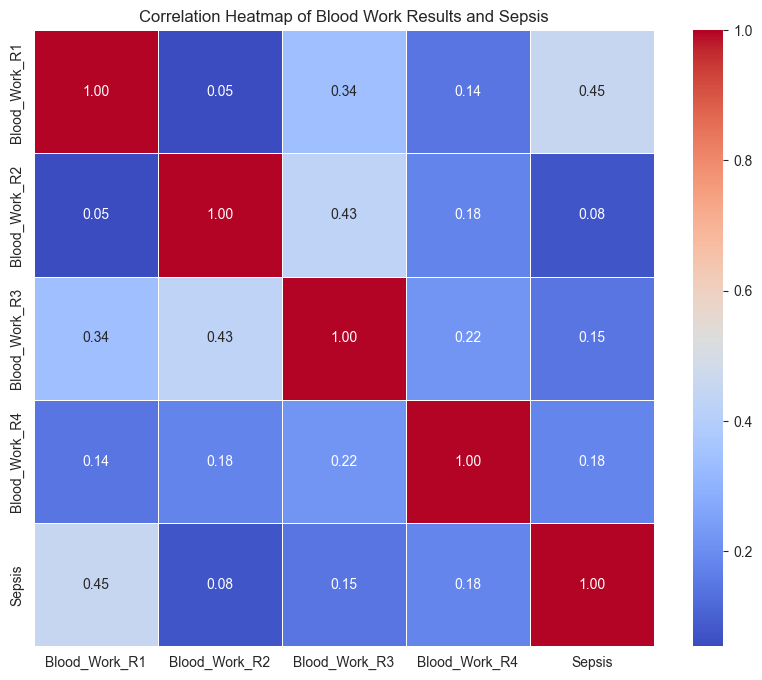

In [117]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Blood Work Results and Sepsis')
plt.show()

"""
This correlation matrix shows the pairwise correlations between the levels of blood work results (Blood_Work_R1, Blood_Work_R2, Blood_Work_R3, Blood_Work_R4) 
and the development of sepsis (Sepsis) in ICU patients. Here's the interpretation:

- Blood_Work_R1 has a moderate positive correlation with Sepsis (0.45), indicating that higher levels of Blood_Work_R1 are associated with an increased likelihood of developing sepsis.
- Blood_Work_R2 has a weak positive correlation with Sepsis (0.08), suggesting a slight tendency for higher levels of Blood_Work_R2 to be associated with sepsis development.
- Blood_Work_R3 also shows a weak positive correlation with Sepsis (0.15), indicating a minor tendency for higher levels of Blood_Work_R3 to be associated with sepsis.
- Blood_Work_R4 has a weak positive correlation with Sepsis (0.18), suggesting a slight tendency for higher levels of Blood_Work_R4 to be associated with sepsis.

Overall, while there are some correlations between the levels of blood work results and the development of sepsis, they are not very strong, indicating that other factors may also play a role in sepsis development.
"""


##### 5. How does age (Age) relate to the probability of developing sepsis?



In [118]:

# Define age categories
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column with age categories
train_data['Age_Category'] = pd.cut(train_data['Patient_age'], bins=age_bins, labels=age_labels)

# Calculate the proportion of patients with sepsis for each age category
age_cat_sepsis_prob = train_data.groupby('Age_Category')['Sepsis'].mean()




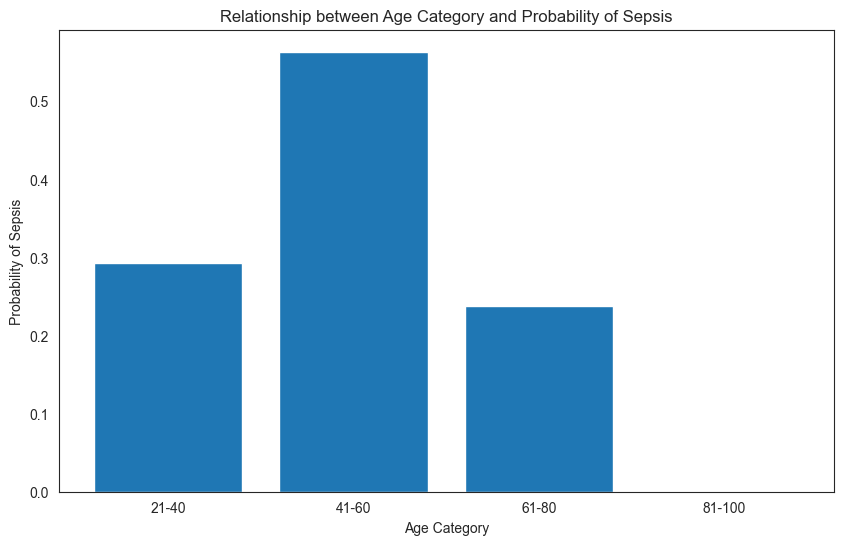

In [119]:
# Plotting the relationship between age categories and the probability of sepsis
plt.figure(figsize=(10, 6))
plt.bar(age_cat_sepsis_prob.index, age_cat_sepsis_prob.values)
plt.xlabel('Age Category')
plt.ylabel('Probability of Sepsis')
plt.title('Relationship between Age Category and Probability of Sepsis')
plt.grid(False)
plt.show()

"""
The provided answer shows the proportion of patients with sepsis for each age category:

- For the age category 0-20, there is no data available (NaN), meaning there are no patients in this age range in the dataset.
- In the age category 21-40, approximately 29.27% of patients develop sepsis.
- In the age category 41-60, around 56.35% of patients develop sepsis, indicating a higher probability compared to other age groups.
- For the age category 61-80, approximately 23.81% of patients develop sepsis.
- Finally, in the age category 81-100, no patients develop sepsis (0%).

This information suggests that the likelihood of developing sepsis varies across different age categories. Specifically, patients aged 41-60 have the highest probability of developing sepsis, while patients in other age categories have lower probabilities.
"""


In [120]:
train_data.drop(columns=['Age_Category'], inplace=True)


#### 6.  Is there a difference in the number of sepsis patients between patients who have insurance and those who do not?



In [121]:
# Calculate the number of sepsis patients for each insurance status
sepsis_counts = train_data.groupby('Insurance')['Sepsis'].sum()

# Print the counts
print("Number of sepsis patients by insurance status:")
print(sepsis_counts)


Number of sepsis patients by insurance status:
Insurance
0     57
1    151
Name: Sepsis, dtype: int64


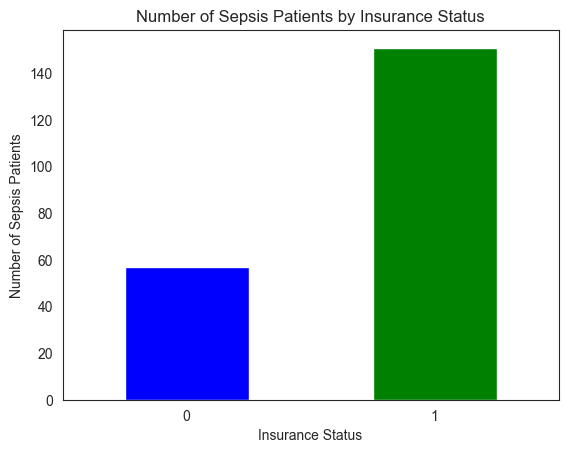

In [122]:

# Plotting the number of sepsis patients by insurance status
sepsis_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Insurance Status')
plt.ylabel('Number of Sepsis Patients')
plt.title('Number of Sepsis Patients by Insurance Status')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


 .There are 57 sepsis patients without insurance and 151 sepsis patients with insurance.

 .  Having insurance likely improves access to healthcare services, promotes early detection and treatment of medical conditions, and enhances overall health outcomes, which could explain the higher number of sepsis patients among those with insurance compared to those without insurance.







####  7. What is the average number of people with sepsis and those without?

In [123]:
# Calculate the average number of people with sepsis
avg_sepsis = sepsis_patients.shape[0] / train_data.shape[0]

# Calculate the average number of people without sepsis
avg_non_sepsis = non_sepsis_patients.shape[0] / train_data.shape[0]

print("Average number of people with sepsis:", avg_sepsis)
print("Average number of people without sepsis:", avg_non_sepsis)


Average number of people with sepsis: 0.34724540901502504
Average number of people without sepsis: 0.6527545909849749


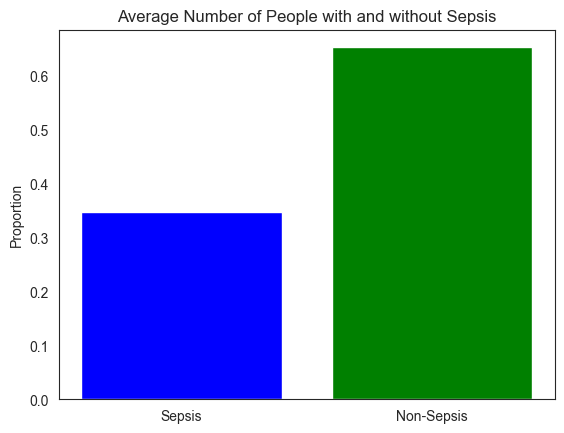

In [124]:

# Calculate the average number of people with sepsis
avg_sepsis = sepsis_patients.shape[0] / train_data.shape[0]

# Calculate the average number of people without sepsis
avg_non_sepsis = non_sepsis_patients.shape[0] / train_data.shape[0]

# Create a bar plot
plt.bar(["Sepsis", "Non-Sepsis"], [avg_sepsis, avg_non_sepsis], color=['blue', 'green'])
plt.title("Average Number of People with and without Sepsis")
plt.ylabel("Proportion")
plt.show()


The summary for the average number of people with and without sepsis is as follows:

. On average, approximately 34.7% of individuals in the dataset have sepsis.

. Conversely, around 65.3% of individuals in the dataset do not have sepsis.
This indicates that there are more individuals without sepsis compared to those with sepsis in the dataset.

#### <b> Testing the Hypothesis

Null Hypothesis (H0): There is no significant difference in the likelihood of developing sepsis between patients with higher Plasma Glucose levels (PRG) and those with lower levels.

Alternate Hypothesis (H1): Patients with higher Plasma Glucose levels (PRG) are significantly more likely to develop sepsis compared to those with lower levels.

In [125]:
train_data['Plasma_glucose'].unique()



array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [126]:


# Split the data into sepsis and non-sepsis groups
sepsis_group = train_data[train_data['Sepsis'] == True]
non_sepsis_group = train_data[train_data['Sepsis'] == False]

# Define the unique characters for Plasma Glucose
plasma_glucose_unique = [6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15, 17, 12, 14]

# Create bins for Plasma Glucose levels (you can adjust these bins based on your data)
bins = [0, 5, 10, 15, 20]

# Assign Plasma Glucose levels to bins
sepsis_group['Plasma_glucose_bin'] = pd.cut(sepsis_group['Plasma_glucose'], bins=bins)
non_sepsis_group['Plasma_glucose_bin'] = pd.cut(non_sepsis_group['Plasma_glucose'], bins=bins)

# Create a contingency table
contingency_table = pd.crosstab(sepsis_group['Plasma_glucose_bin'], sepsis_group['Sepsis'])

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject Null Hypothesis (H0): There is a significant difference in the likelihood of developing sepsis between patients with higher and lower Plasma Glucose levels.")
else:
    print("Fail to reject Null Hypothesis (H0): There is no significant difference in the likelihood of developing sepsis between patients with higher and lower Plasma Glucose levels.")

# Print the p-value
print("P-value:", p)

Fail to reject Null Hypothesis (H0): There is no significant difference in the likelihood of developing sepsis between patients with higher and lower Plasma Glucose levels.
P-value: 1.0


. The results indicates that the statistical analysis did not find enough evidence to support the idea that there's a significant difference in sepsis development based on Plasma Glucose levels.

.This interpretation underscores the importance of considering other factors or conducting further research to better understand the relationship between Plasma Glucose levels and sepsis development.

### <b> Data Preparation

In [127]:
train_data.head(10)

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,6,148,72,35,0,33.6,0.627,50,0,True
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,1,False
4,0,137,40,35,168,43.1,2.288,33,1,True
5,5,116,74,0,0,25.6,0.201,30,1,False
6,3,78,50,32,88,31.0,0.248,26,0,True
7,10,115,0,0,0,35.3,0.134,29,1,False
8,2,197,70,45,543,30.5,0.158,53,1,True
9,8,125,96,0,0,0.0,0.232,54,1,True


In [128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Plasma_glucose  599 non-null    int64  
 1   Blood_Work_R1   599 non-null    int64  
 2   Blood_Pressure  599 non-null    int64  
 3   Blood_Work_R2   599 non-null    int64  
 4   Blood_Work_R3   599 non-null    int64  
 5   BMI             599 non-null    float64
 6   Blood_Work_R4   599 non-null    float64
 7   Patient_age     599 non-null    int64  
 8   Insurance       599 non-null    int64  
 9   Sepsis          599 non-null    bool   
dtypes: bool(1), float64(2), int64(7)
memory usage: 42.8 KB


##### Drop the Outliers

In [129]:

# Define the numerical features
numerical_features = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age']

# Creating a copy of the DataFrame to preserve the original data
df_trim = train_data.copy()

# Calculating the IQR
Q1 = train_data[numerical_features].quantile(0.25)
Q3 = train_data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Creating a mask to identify outliers
outlier_mask = ((train_data[numerical_features] < (Q1 - 1.5 * IQR)) | (train_data[numerical_features] > (Q3 + 1.5 * IQR)))

# Removing outliers
df_trim = df_trim[~outlier_mask.any(axis=1)]

# Display the shape of the cleaned dataset
print("Original shape:", train_data.shape)
print("Shape after removing outliers:", df_trim.shape)


Original shape: (599, 10)
Shape after removing outliers: (493, 10)


In [130]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Plasma_glucose  599 non-null    int64  
 1   Blood_Work_R1   599 non-null    int64  
 2   Blood_Pressure  599 non-null    int64  
 3   Blood_Work_R2   599 non-null    int64  
 4   Blood_Work_R3   599 non-null    int64  
 5   BMI             599 non-null    float64
 6   Blood_Work_R4   599 non-null    float64
 7   Patient_age     599 non-null    int64  
 8   Insurance       599 non-null    int64  
 9   Sepsis          599 non-null    bool   
dtypes: bool(1), float64(2), int64(7)
memory usage: 42.8 KB


### **Splitting the Data into Training and Validation Sets** ###

In [131]:
# Define your features (X) and target variable (y)
X = train_data.drop('Sepsis', axis=1)
y = train_data['Sepsis']

In [132]:
X.dtypes

Plasma_glucose      int64
Blood_Work_R1       int64
Blood_Pressure      int64
Blood_Work_R2       int64
Blood_Work_R3       int64
BMI               float64
Blood_Work_R4     float64
Patient_age         int64
Insurance           int64
dtype: object

### Create a Preprocessor ###

In [133]:
input_features = X.columns
preprocessor = ColumnTransformer(
    transformers= [
        ('scaler', StandardScaler(),input_features),
        ('log_transformation', FunctionTransformer(np.log1p), input_features)
    ]
)

In [134]:
# Check the class distribution in the training set before balancing
print("Class distribution before balancing:")
print(y.value_counts())

Class distribution before balancing:
Sepsis
False    391
True     208
Name: count, dtype: int64


#### Use SMOTE to balance data

In [135]:
# Applying SMOTE
smote = SMOTE(random_state=42)

# Resample the training data using SMOTE to address class imbalance
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# Check the class distribution after balancing
balanced_class_counts = y_train_resampled.value_counts()
print("\nClass distribution in the balanced training set:")
print(balanced_class_counts)



Class distribution in the balanced training set:
Sepsis
True     391
False    391
Name: count, dtype: int64


#### Split the data into training and evaluation sets 

In [136]:


# Split the data into training and evaluation sets (80% train, 20% test)
X_train, X_eval, y_train, y_eval = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)
# Print the shapes of the training and evaluation sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Evaluation set shape:", X_eval.shape, y_eval.shape)


Training set shape: (625, 9) (625,)
Evaluation set shape: (157, 9) (157,)


#### Encoder

In [137]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the target variable (y) for training set
y_train_encoded = encoder.fit_transform(y_train)

# Encode the target variable (y) for evaluation set using the same encoder
y_eval_encoded = encoder.transform(y_eval)

In [138]:
y_train_encoded

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [139]:
y_eval_encoded

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1], dtype=int64)

### Modelling

In [140]:


# Initialize SVC
svc_model =  SVC(probability=True)

all_pipelines = {}

# List of models including the modified SVC model
models = [
    ("LogisticRegression", LogisticRegression()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("SVC", svc_model),  # Modified SVC model
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("GaussianNB", GaussianNB())
]

# Now continue with the rest of your code for creating ROC curves

metrics = []

# Iterating over models
for model_name, model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)

    all_pipelines[model_name] = pipeline

    # Predict using the evaluation set
    y_pred = pipeline.predict(X_eval)

    # Calculate the metrics
    acc = accuracy_score(y_eval_encoded, y_pred)
    f1 = f1_score(y_eval_encoded, y_pred)
    roc = roc_auc_score(y_eval_encoded, y_pred)
    pr = precision_score(y_eval_encoded, y_pred)
    rc = recall_score(y_eval_encoded, y_pred)

    # Append the metrics to the list
    metrics.append({"Model": model_name,
                    "Accuracy Score": acc,
                    "F1 Score": f1,
                    "ROC AUC Score": roc,
                    "Precision Score": pr,
                    "Recall Score": rc})

# Creating a DataFrame for the overall performance
overall = pd.DataFrame(metrics)
overall = overall.sort_values(by="Accuracy Score", ascending=False)
overall_styled = overall.style.background_gradient(cmap="inferno")
overall_styled

,Model,Accuracy Score,F1 Score,ROC AUC Score,Precision Score,Recall Score
2,RandomForestClassifier,0.783439,0.790123,0.783674,0.761905,0.820513
5,GradientBoostingClassifier,0.777070,0.782609,0.777264,0.759036,0.807692
1,DecisionTreeClassifier,0.732484,0.737500,0.732636,0.719512,0.756410
4,KNeighborsClassifier,0.726115,0.742515,0.726550,0.696629,0.794872
3,SVC,0.719745,0.717949,0.719734,0.717949,0.717949
0,LogisticRegression,0.694268,0.684211,0.694093,0.702703,0.666667
6,GaussianNB,0.694268,0.703704,0.694499,0.678571,0.730769


In [141]:
all_pipelines

{'LogisticRegression': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                   Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
        'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
       dtype='object')),
                                                  ('log_transformation',
                                                   FunctionTransformer(func=<ufunc 'log1p'>),
                                                   Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
        'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
       dtype='object'))])),
                 ('model', LogisticRegression())]),
 'DecisionTreeClassifier': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                          

#### Plotting ROC Curve.

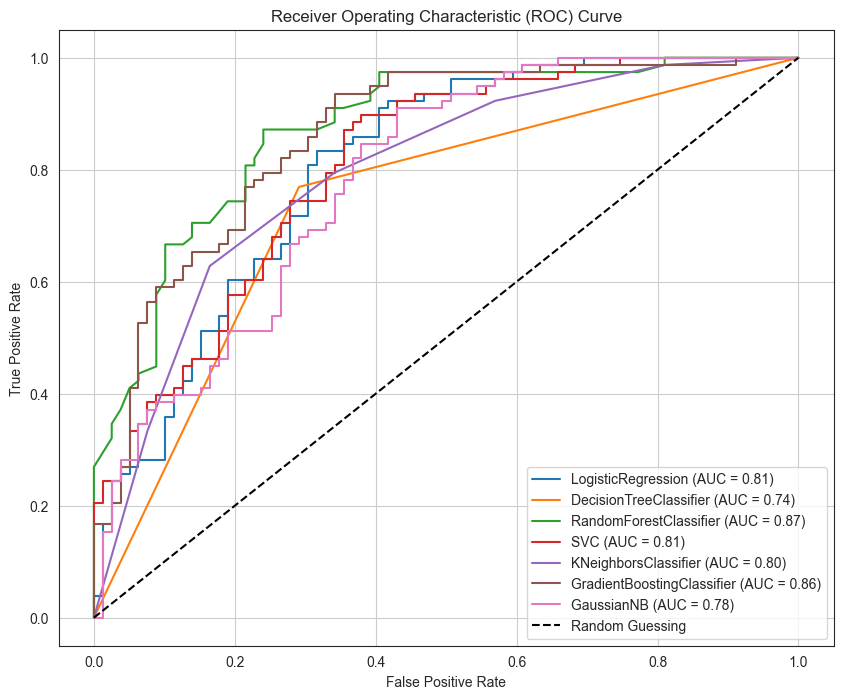

In [142]:

# Fit each model to the training data and plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict probabilities for the evaluation set
    y_probs = pipeline.predict_proba(X_eval)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_eval, y_probs)
    auc = roc_auc_score(y_eval, y_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot ROC curve for random guessing (50%)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

As seen from the curve, the best 3 performing models are Randomforest,Gradientboosting and LogisticRegression

### Hyperparameter tuning of best performing models using Gridsearch.

In [143]:
forest_pipeline = all_pipelines['RandomForestClassifier']
forest_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [144]:
LogisticRegression_pipeline = all_pipelines['LogisticRegression']
LogisticRegression_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [145]:
GradientBoosting_pipeline = all_pipelines['GradientBoostingClassifier']
GradientBoosting_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object'))])),
                ('model', GradientBoostingClassifier())])

In [146]:


# Define parameter grids for each pipeline
param_grid_forest = {
    'model__n_estimators': [5, 10, 20, 50],  
    'model__max_depth': [None, 3, 6, 9],      
    'model__min_samples_split': [2, 4, 6, 8]  
}

param_grid_logistic = {
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l1', 'l2']
}

param_grid_gradientboosting = {
    'model__learning_rate': [0.01, 0.1, 0.5],
    'model__n_estimators': [50, 100, 200]
}

# Create GridSearchCV objects for each pipeline
grid_search_forest = GridSearchCV(
    estimator=all_pipelines['RandomForestClassifier'],
    param_grid=param_grid_forest,
    cv=5,
    scoring='f1'
)

grid_search_logistic = GridSearchCV(
    estimator=all_pipelines['LogisticRegression'],
    param_grid=param_grid_logistic,
    cv=5,
    scoring='f1'
)

grid_search_gradientboosting = GridSearchCV(
    estimator=all_pipelines['GradientBoostingClassifier'],
    param_grid=param_grid_gradientboosting,
    cv=5,
    scoring='f1'
)

# Fit the GridSearchCV objects on the training data
grid_search_forest.fit(X_train, y_train_encoded)
grid_search_logistic.fit(X_train, y_train_encoded)
grid_search_gradientboosting.fit(X_train, y_train_encoded)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object')),
                                                                        ('log_transformation',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object'))])),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.01, 0.1, 0.5],
                         'model__n_estimators': [50, 100, 200]},
             scoring='f1')

In [147]:
best_parametres_forest = grid_search_forest.best_params_
best_parametres_forest

{'model__max_depth': 9,
 'model__min_samples_split': 2,
 'model__n_estimators': 50}

In [148]:
best_parameter_logis =grid_search_logistic.best_params_
best_parameter_logis

{'model__C': 10, 'model__penalty': 'l2'}

In [149]:
best_parameter_grad =grid_search_gradientboosting.best_params_
best_parameter_grad

{'model__learning_rate': 0.1, 'model__n_estimators': 50}

### Train Models using best parameters

In [150]:
forest_pipeline.set_params(**best_parametres_forest)
forest_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=9, n_estimators=50))])

In [151]:
LogisticRegression_pipeline.set_params(**best_parameter_logis)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object'))])),
                ('model', LogisticRegression(C=10))])

In [152]:
GradientBoosting_pipeline.set_params(**best_parameter_grad)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object'))])),
                ('model', GradientBoostingClassifier(n_estimators=50))])

In [153]:
# Get the best parameters
best_forest_params = grid_search_forest.best_params_
best_logistic_params = grid_search_logistic.best_params_
best_gradientboosting_params = grid_search_gradientboosting.best_params_

# Update the parameters of the pipelines
all_pipelines['RandomForestClassifier'].set_params(**best_forest_params)
all_pipelines['LogisticRegression'].set_params(**best_logistic_params)
all_pipelines['GradientBoostingClassifier'].set_params(**best_gradientboosting_params)

# Fit the updated pipelines on the training data
all_pipelines['RandomForestClassifier'].fit(X_train, y_train_encoded)
all_pipelines['LogisticRegression'].fit(X_train, y_train_encoded)
all_pipelines['GradientBoostingClassifier'].fit(X_train, y_train_encoded)

# Predict using the updated pipelines on the evaluation set
forest_y_pred_eval = all_pipelines['RandomForestClassifier'].predict(X_eval)
logistic_y_pred_eval = all_pipelines['LogisticRegression'].predict(X_eval)
gradientboosting_y_pred_eval = all_pipelines['GradientBoostingClassifier'].predict(X_eval)

# Evaluate performance metrics on the evaluation set
forest_accuracy_eval = accuracy_score(y_eval_encoded, forest_y_pred_eval)
forest_precision_eval = precision_score(y_eval_encoded, forest_y_pred_eval)
forest_recall_eval = recall_score(y_eval_encoded, forest_y_pred_eval)
forest_f1_eval = f1_score(y_eval_encoded, forest_y_pred_eval)

logistic_accuracy_eval = accuracy_score(y_eval_encoded, logistic_y_pred_eval)
logistic_precision_eval = precision_score(y_eval_encoded, logistic_y_pred_eval)
logistic_recall_eval = recall_score(y_eval_encoded, logistic_y_pred_eval)
logistic_f1_eval = f1_score(y_eval_encoded, logistic_y_pred_eval)

gradientboosting_accuracy_eval = accuracy_score(y_eval_encoded, gradientboosting_y_pred_eval)
gradientboosting_precision_eval = precision_score(y_eval_encoded, gradientboosting_y_pred_eval)
gradientboosting_recall_eval = recall_score(y_eval_encoded, gradientboosting_y_pred_eval)
gradientboosting_f1_eval = f1_score(y_eval_encoded, gradientboosting_y_pred_eval)

# Print performance metrics for each model on the evaluation set
print("Performance metrics for RandomForestClassifier on the evaluation set:")
print("Accuracy:", forest_accuracy_eval)
print("Precision:", forest_precision_eval)
print("Recall:", forest_recall_eval)
print("F1 Score:", forest_f1_eval)

print("\nPerformance metrics for LogisticRegression on the evaluation set:")
print("Accuracy:", logistic_accuracy_eval)
print("Precision:", logistic_precision_eval)
print("Recall:", logistic_recall_eval)
print("F1 Score:", logistic_f1_eval)

print("\nPerformance metrics for GradientBoostingClassifier on the evaluation set:")
print("Accuracy:", gradientboosting_accuracy_eval)
print("Precision:", gradientboosting_precision_eval)
print("Recall:", gradientboosting_recall_eval)
print("F1 Score:", gradientboosting_f1_eval)


Performance metrics for RandomForestClassifier on the evaluation set:
Accuracy: 0.7707006369426752
Precision: 0.7441860465116279
Recall: 0.8205128205128205
F1 Score: 0.7804878048780488

Performance metrics for LogisticRegression on the evaluation set:
Accuracy: 0.7070063694267515
Precision: 0.7162162162162162
Recall: 0.6794871794871795
F1 Score: 0.6973684210526315

Performance metrics for GradientBoostingClassifier on the evaluation set:
Accuracy: 0.7579617834394905
Precision: 0.75
Recall: 0.7692307692307693
F1 Score: 0.759493670886076


### Save the models on joblib 

In [154]:


# Create the directory if it doesn't exist
os.makedirs('./models/', exist_ok=True)

# Save GradientBoosting_pipeline
joblib.dump(GradientBoosting_pipeline, './models/GradientBoosting_pipeline.joblib')

# Save LogisticRegression_pipeline
joblib.dump(LogisticRegression_pipeline, './models/LogisticRegression_pipeline.joblib')

# Save forest_pipeline
joblib.dump(forest_pipeline, './models/forest_pipeline.joblib')


# Save encoder
joblib.dump(encoder, './models/encoder.joblib')

['./models/encoder.joblib']